In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data=pd.read_csv('files/data_science_salaries.csv')

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [4]:
len(data)

245

In [5]:
data.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
data.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [7]:
data['work_year'].unique()

array(['2021e', '2020'], dtype=object)

In [8]:
data['experience_level'].unique()

array(['EN', 'SE', 'EX', 'MI'], dtype=object)

In [9]:
data['company_size'].unique()

array(['L', 'M', 'S'], dtype=object)

In [10]:
data.groupby('experience_level')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,54.0,59753.462963,49103.427811,4000.0,21732.25,58800.5,82500.0,250000.0
EX,11.0,226288.000000,164029.405584,70329.0,114021.50,154963.0,280000.0,600000.0
MI,103.0,85738.135922,78324.468318,2876.0,40505.00,73000.0,110000.0,450000.0
SE,77.0,128841.298701,67909.763752,19052.0,78340.00,120000.0,170000.0,412000.0


In [11]:
data.groupby('company_size')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,132.0,114374.015152,90822.326575,5898.0,56183.5,91500.0,150000.0,600000.0
M,55.0,85082.818182,72504.464408,4000.0,36337.5,71968.0,116062.5,450000.0
S,58.0,80874.793103,72038.848392,2876.0,35555.5,68364.5,101951.0,416000.0


In [12]:
data.groupby('experience_level')['salary_in_usd'].mean()

experience_level
EN     59753.462963
EX    226288.000000
MI     85738.135922
SE    128841.298701
Name: salary_in_usd, dtype: float64

In [13]:
data.groupby('company_size')['salary_in_usd'].mean()

company_size
L    114374.015152
M     85082.818182
S     80874.793103
Name: salary_in_usd, dtype: float64

<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='company_size'>

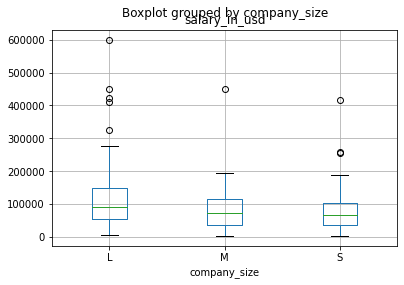

In [14]:
data.boxplot(column='salary_in_usd',by='company_size')

In [16]:
plot_data=data.groupby(['company_size','experience_level'])['salary_in_usd'].mean().unstack()

In [18]:
plot_data

experience_level,EN,EX,MI,SE
company_size,,,,
L,75148.000000,239729.875,96285.451613,134465.604651
M,41063.923077,85000.000,83982.800000,122572.125000
S,57502.000000,243164.500,47610.000000,120978.055556


In [19]:
plot_data=plot_data.reindex(index=['S','M','L'])
plot_data=plot_data[['EN','MI','SE','EX']]
plot_data

experience_level,EN,MI,SE,EX
company_size,,,,
S,57502.000000,47610.000000,120978.055556,243164.500
M,41063.923077,83982.800000,122572.125000,85000.000
L,75148.000000,96285.451613,134465.604651,239729.875


<AxesSubplot:xlabel='company_size', ylabel='USDsalary'>

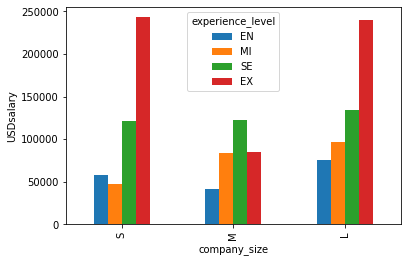

In [22]:
plot_data.plot.bar(ylabel='USD salary')